In [2]:
import numpy as np
import mdtraj as md
import pickle
from os.path import join
import matplotlib.pyplot as plt
%matplotlib inline
import mdtraj as md
import seaborn as sns
import matplotlib.gridspec as gridspec
from matplotlib.ticker import MultipleLocator


In [3]:
data_dir = 'Data/Chodera_data/Processed/Artificial_Trajectory_1-frame-per-ps'
out_dir = 'Movies/Artificial_Trajectory/20fps'

In [4]:
num_frames = 50*20 # 50 seconds * 20 frames per second

In [5]:
entropy = np.load(join(data_dir, 'shannon_entropy_traj_lag1.0ps.npy'))
fast_modes = np.load(join(data_dir, 'fast_modes_lag1.0ps.npy'))
hmm_traj = np.load(join(data_dir, 'probabilistic_traj_lag1.0ps.npy'))
free_energy_traj = np.load(join(data_dir, 'free_energy_traj_lag1.0ps.npy'))
time = np.arange(hmm_traj.shape[0])/1000

In [6]:
htraj = np.load(join(data_dir, 'htraj_lag1.0ps.npy'))
otraj = np.load(join(data_dir, 'otraj_lag1.0ps.npy'))
traj = md.load(join(data_dir, 'otraj_lag1.0ps.nc'), top=join(data_dir, 'a1e-solute.pdb'))

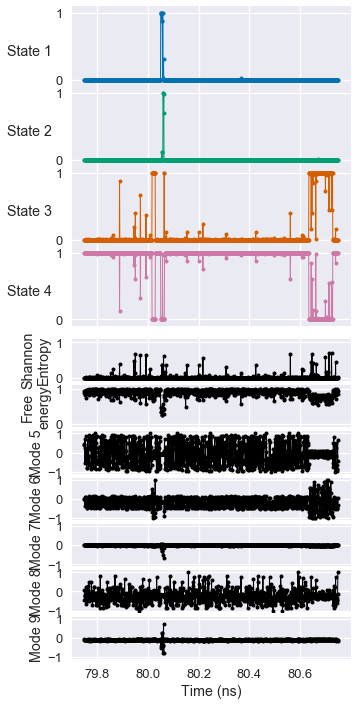

In [7]:

n_sets = 4
state_colours  = sns.color_palette('colorblind', n_sets)
start = 79750
end, stride =  start+num_frames-1, 1

with sns.plotting_context('talk', font_scale=1):
    ticker = MultipleLocator(base=1.0)
    
    plot_kws = dict(marker='o', ls='-', ms=4, linewidth=1)
    
    f = plt.figure(figsize=(5,12))
    
    gs0 = gridspec.GridSpec(2, 1, hspace=0.04, height_ratios=[3,3])
    gs00 = gridspec.GridSpecFromSubplotSpec(4, 1, subplot_spec=gs0[0], hspace=0)
    gs01 = gridspec.GridSpecFromSubplotSpec(7, 1, subplot_spec=gs0[1],hspace=0.1)
    
    # HMM Trajectories
    ystart, yend = -0.1, 1.1   
    for state in range(n_sets):
        ax = plt.Subplot(f, gs00[state, :])
        f.add_subplot(ax)
        ax.plot(time[start:end:stride], hmm_traj[start:end:stride, state], color=state_colours[state], 
                label='State {}'.format(state+1), **plot_kws )
        ax.set_ylim((ystart, yend))

        if state<n_sets:
            ax.set_xticklabels(['' for _ in ax.get_xticklabels()])
        ax.set_ylabel('State {}'.format(state+1), rotation=0, labelpad=10)
        ax.yaxis.set_label_coords(-0.15,0.35)
#         ax.tick_params(axis='both', which='both', bottom='off', top='off', left='off', labelbottom='off', labelleft='off')
        ax.yaxis.set_major_locator(ticker)
    # Entropy
    ax = plt.Subplot(f, gs01[0, :])
    f.add_subplot(ax)
    
    ax.plot(time[start:end:stride], entropy[start:end:stride], color='k', **plot_kws)
    ax.set_xticklabels(['' for _ in ax.get_xticklabels()])
    ax.set_ylabel('Shannon\nEntropy')
    ax.set_ylim((ystart, yend))

    # Free energy
    ax = plt.Subplot(f, gs01[1, :])
    f.add_subplot(ax)
    ax.plot(time[start:end:stride], free_energy_traj[start:end:stride], color='k', **plot_kws)
    ax.set_ylabel('Free\nenergy')
    ax.set_xticklabels(['' for _ in ax.get_xticklabels()])
    ax.set_ylim((ystart, yend))
    
    # Example Fast motion
    for i, k in enumerate(range(2,7)):
        ax = plt.Subplot(f, gs01[k, :])
        f.add_subplot(ax)
        ax.plot(time[start:end:stride], fast_modes[start:end:stride,i], color='k', **plot_kws)
        ax.set_ylabel('Mode {}'.format(k+3))
        ax.set_ylim((-yend, yend))
        ax.set_xlabel('Time (ns)')
#     plt.savefig('figures/trajectory_fig.pdf', bbox_inches='tight')


    



In [21]:
np.save(join(out_dir, 'shannon_entropy_traj_lag1.0ps.npy'), entropy[start:end:stride])
np.save(join(out_dir, 'fast_modes_lag1.0ps.npy'), fast_modes[start:end:stride])
np.save(join(out_dir, 'probabilistic_traj_lag1.0ps.npy'),hmm_traj[start:end:stride])
np.save(join(out_dir, 'free_energy_traj_lag1.0ps.npy'), free_energy_traj[start:end:stride])


In [23]:
np.save(join(out_dir, 'htraj_lag1.0ps.npy'), htraj[start:end:stride])
np.save(join(out_dir, 'otraj_lag1.0ps.npy'), otraj[start:end:stride])
traj[start:end:stride].save(join(out_dir, 'otraj_lag1.0ps.nc'))